In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt
import tensorflow as tf 

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [5]:
df=pd.read_csv("ucus.csv")

In [6]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [8]:
df.columns

Index(['Month', 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], dtype='object')

In [9]:
df.columns=["Month","Pes"]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   145 non-null    object 
 1   Pes     144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [13]:
df.isnull().sum()

Month    0
Pes      1
dtype: int64

In [14]:
df.tail

<bound method NDFrame.tail of                                                  Month    Pes
0                                              1949-01  112.0
1                                              1949-02  118.0
2                                              1949-03  132.0
3                                              1949-04  129.0
4                                              1949-05  121.0
..                                                 ...    ...
140                                            1960-09  508.0
141                                            1960-10  461.0
142                                            1960-11  390.0
143                                            1960-12  432.0
144  International airline passengers: monthly tota...    NaN

[145 rows x 2 columns]>

In [18]:
df.dropna(inplace=True)
df.head()
df.tail()

,Month,Pes
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [19]:
df["Month"]=pd.to_datetime(df["Month"])
df.index=df["Month"]
df.drop("Month",axis=1,inplace=True)
df.head()

,Pes
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: title={'center': 'aylara göre ucus'}, xlabel='Month'>

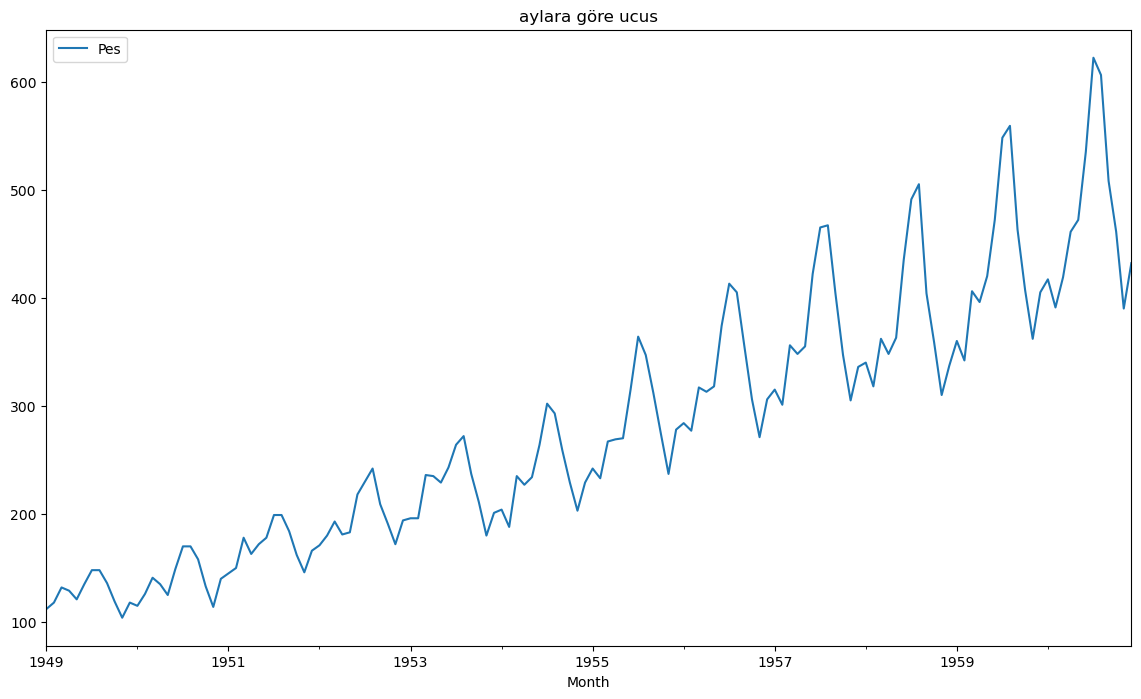

In [20]:
df.plot(figsize=(14,8),title="aylara göre ucus")

In [22]:
data=df["Pes"].values
data=data.astype('float32')
data=data.reshape(-1,1)
data.shape

(144, 1)

In [25]:
def split_data(df,size):
    pos=int(round(len(df)*(1-size)))
    train=df[:pos]
    test=df[pos:]
    return train,test,pos

In [26]:
train,test,pos=split_data(data,0.3)

In [31]:
train.shape,test.shape

((101, 1), (43, 1))

In [32]:
sc_train=MinMaxScaler(feature_range=(0,1))
train=sc_train.fit_transform(train)

In [33]:
sc_test=MinMaxScaler(feature_range=(0,1))
test=sc_test.fit_transform(test)

In [34]:
train[:5],test[:5]

(array([[0.02588999],
        [0.04530746],
        [0.09061491],
        [0.08090615],
        [0.05501619]], dtype=float32),
 array([[0.36908513],
        [0.50473183],
        [0.511041  ],
        [0.31230277],
        [0.13249213]], dtype=float32))